In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = [15,10]

In [4]:
procrustes = np.load("procruste.npy")
ids_f = np.load("procruste_artificiales_files.npy")
ids = list(map(lambda x: re.findall(r'\d+', x)[1], ids_f))

In [5]:
ids_r = np.load("procrustes_id_reales.npy")
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(np.array(ids_r, dtype=np.int))]

In [6]:
sexo_r = np.array(list(map(lambda x: np.array(data[data['id'] == int(x)][["sexo"]])[0], ids_r))).reshape(115)
sexo_r["f" == sexo_r] = "red"
sexo_r["m" == sexo_r] = "blue"
sexo_r["m " == sexo_r] = "blue"

In [16]:
procrustes.shape

(565, 339000, 2)

In [19]:
procrustes = procrustes.reshape((565, 250, -1, 2))

In [21]:
procrustes.shape

(565, 250, 1356, 2)

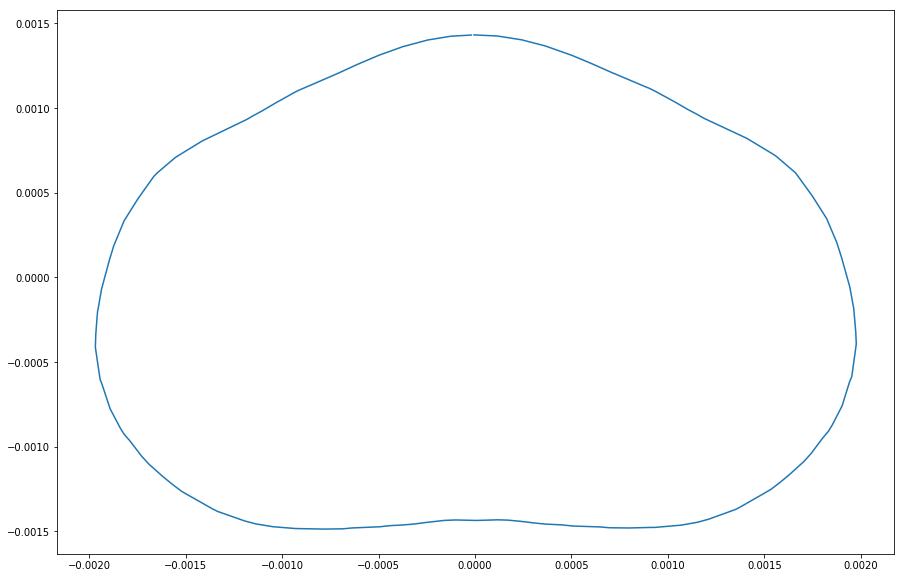

In [25]:
plt.plot(procrustes[0][50][:, 0], procrustes[0][50][:, 1])

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrustes[0][:,0],procrustes[0][:,1],"-")
#ax1.set_title("id="+ids[0])
ax2.plot(procrustes[2][:,0],procrustes[2][:,1],"-")
#ax2.set_title("id="+ids[5])
ax3.plot(procrustes[10][:,0],procrustes[10][:,1],"-")
#ax3.set_title("id="+ids[6])
ax4.plot(procrustes[-1][:,0],procrustes[-1][:,1],"-")
#ax4.set_title("id="+ids[-1])

In [9]:
from sklearn import decomposition

In [31]:
procrustes = procrustes.reshape(565, -1)

In [34]:
pcs = 60
pca = decomposition.PCA(n_components=pcs, svd_solver='randomized')
pca.fit(procrustes)
print("Con n_components = {} el valor es: {} ".format(pcs, pca.explained_variance_ratio_.sum()))

Con n_components = 60 el valor es: 0.801695716576 


In [35]:
x_out = pca.transform(procrustes)
x_out.shape

(520, 60)

In [12]:
b = procrustes[ids == "149"]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  if __name__ == '__main__':


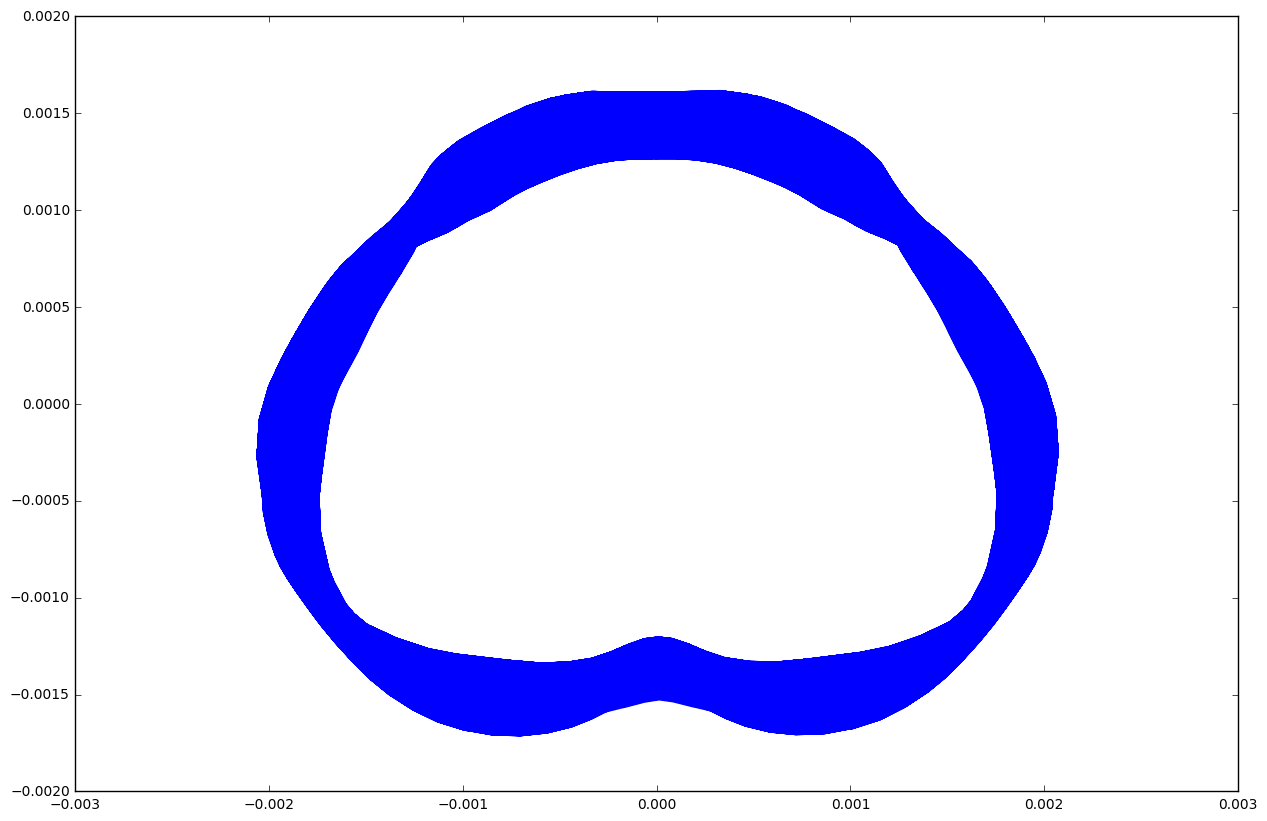

In [13]:
plt.plot(b[:, 0], b[:, 1])

In [14]:
sexo = list(map(lambda x:"blue" if x.find("_M") != -1 else "red", ids_f))

In [15]:
sexo  = np.array(sexo)

In [16]:
sexo

array(['blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue',
       'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red',
       'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red',
       'red', 'blue', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue',
       'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red',
       'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red',
       'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'red',
       'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue',
       'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue',
       'red', 'red', 'blue', 'red', 

In [17]:
plt.scatter(x_out[0:450, 6], x_out[0:450, 3], marker="o", s=70, c=sexo)
plt.scatter(x_out[450:, 6], x_out[450:, 3], marker="^", s=70, c=list(sexo_r))
# for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# PREDICCIÓN 

In [18]:
import sklearn
from sklearn.svm import SVC

In [39]:
X = x_out
y = np.concatenate([sexo, sexo_r])

In [43]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.30, random_state=42)

In [44]:
clf = SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
clf.score(X_test,y_test)

0.5641025641025641

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
clf = ExtraTreesClassifier(n_estimators=100,
                           max_features=0.3,
                           max_depth=4, #20
                           random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       blue       1.00      0.82      0.90        68
        red       0.88      1.00      0.94        88

avg / total       0.93      0.92      0.92       156



In [47]:
clf.score(X_test,y_test)

0.92307692307692313

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [49]:
scores.mean()

0.95192307692307698

In [50]:
scores.std()

0.091422033261574706

# CLUSTERING

In [51]:
from sklearn.cluster import KMeans
import numpy as np

In [52]:
kmeans = KMeans(n_clusters=3).fit(X[:,[3,4]])
kmeans.labels_

array([0, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0,
       2, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0,
       1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1,
       0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1,
       1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1,
       1, 1,

In [53]:
ids_r_t = list(map(lambda x: x + "_R", ids_r))

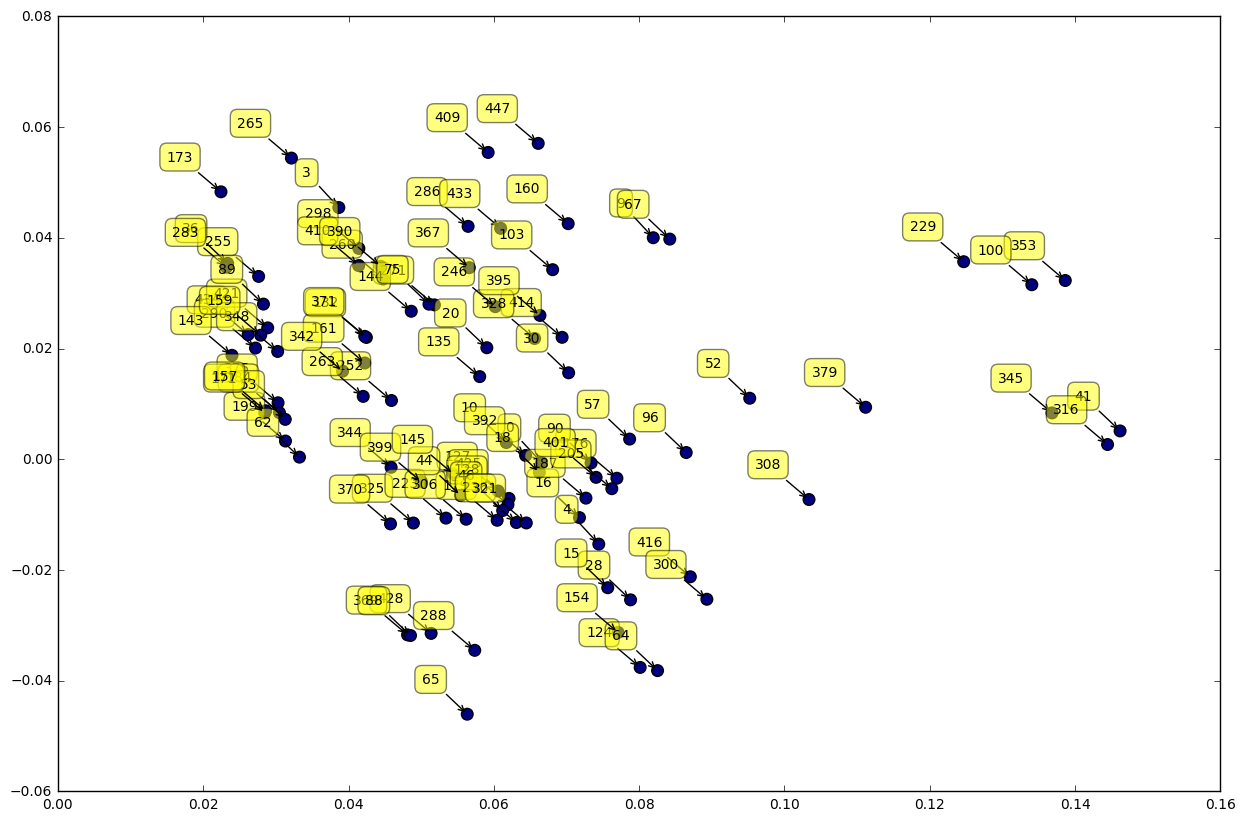

In [61]:
plt.scatter(x_out[kmeans.labels_ == 0][:, 3], x_out[kmeans.labels_ == 0][:, 4], marker="o", s=70, c=list(kmeans.labels_[kmeans.labels_ == 0]))
for label, x, y in zip(np.concatenate([ids, ids_r_t]), x_out[kmeans.labels_ == 0][:,3], x_out[kmeans.labels_ == 0][:,4]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [32]:
procrustes = procrustes[kmeans.labels_ != 2]

In [42]:
y = y[kmeans.labels_ != 2]